In [1]:
import numpy as np
import pandas as pd
import math

from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# df = pd.read_excel('130N_Cycles_1-47.xlsx',sheetname='Specimen_RawData_1')
# df = df.drop(0)
# df = df.reset_index()
# df.drop('index',axis=1,inplace = True)

In [3]:
df = pd.read_excel('130N_Cycles_1-47.xlsx',sheetname='Specimen_RawData_1',skiprows=[0])
df.columns = ['time','load']

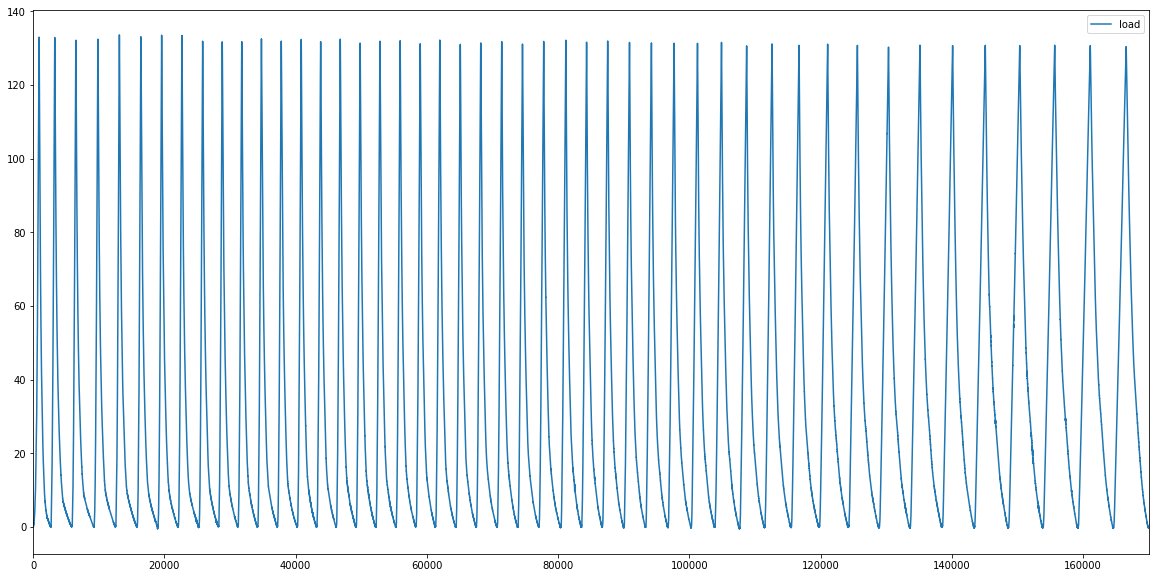

In [4]:
df.plot(y='load',figsize=(20,10))

In [5]:
# # LSTM for international airline passengers problem with regression framing
# import numpy
# import matplotlib.pyplot as plt
# # from pandas import read_csv
# import pandas as pd
# import math
# # from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_squared_error
# # convert an array of values into a dataset matrix

In [6]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [8]:
# fix random seed for reproducibility
np.random.seed(7)
# dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)

In [9]:
# load the dataset
dataframe = pd.read_excel('130N_Cycles_1-47.xlsx',sheetname='Specimen_RawData_1',skiprows=[0])
dataframe.columns = ['time','load']
dataframe.drop('time',inplace=True,axis=1)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

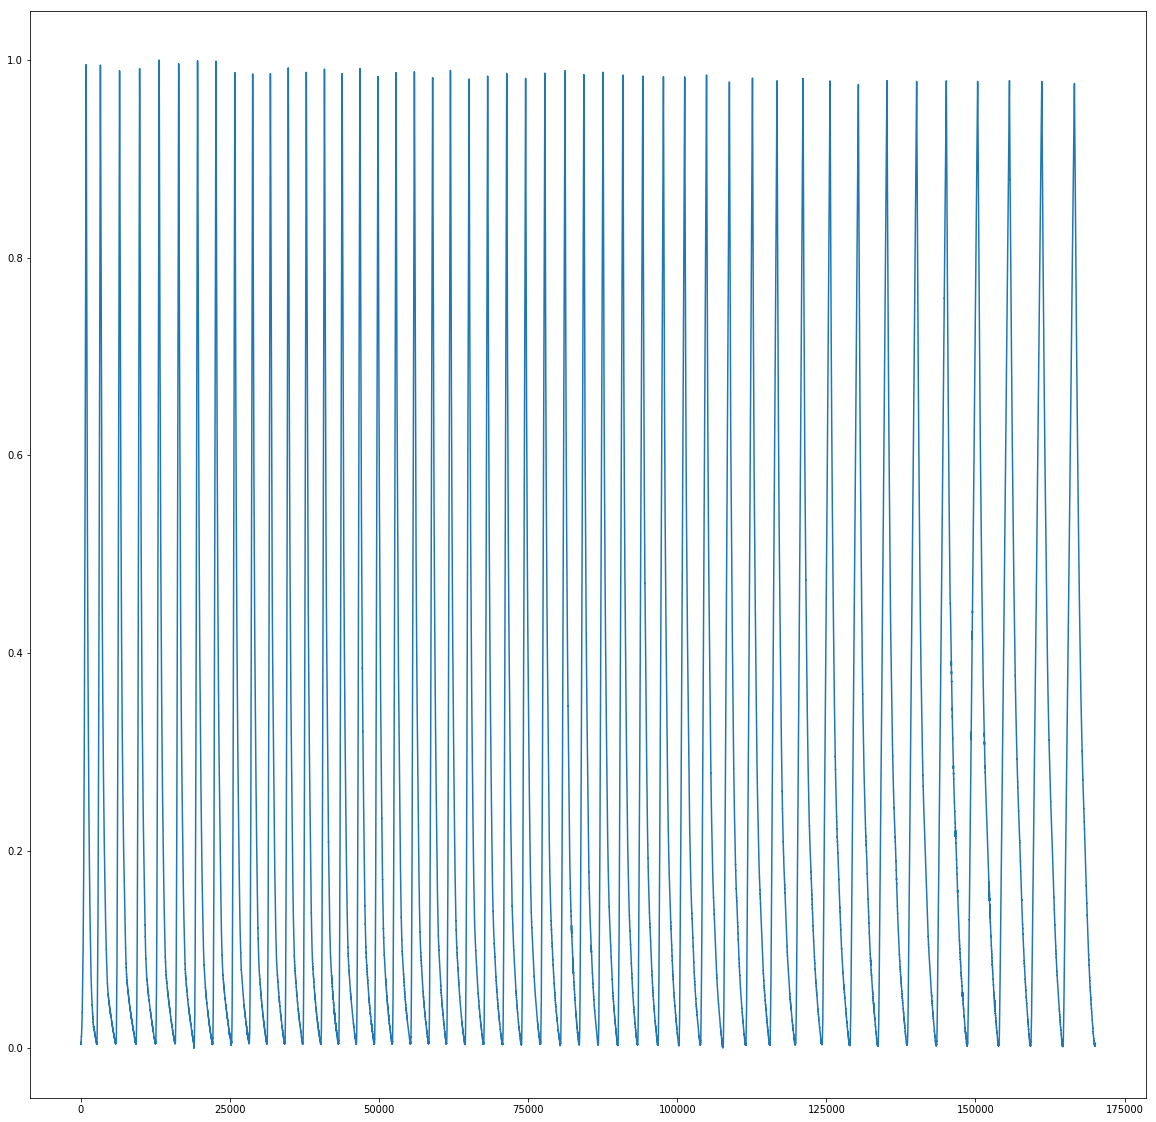

In [14]:
plt.figure(figsize=(20,20))
plt.plot(dataset)
plt.show()

In [72]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [73]:
print(train.shape)
print(test.shape)

(113967, 1)
(56134, 1)


In [74]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [75]:
# print(trainX)
# print(trainY)
# print(testX)
# print(testY)
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(113965, 1)
(113965,)
(56132, 1)
(56132,)


In [76]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [77]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(113965, 1, 1)
(113965,)
(56132, 1, 1)
(56132,)


In [78]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=32, verbose=2)

Epoch 1/50
6s - loss: 0.0059
Epoch 2/50
7s - loss: 1.7359e-05
Epoch 3/50
6s - loss: 6.4211e-06
Epoch 4/50
8s - loss: 1.4072e-06
Epoch 5/50
7s - loss: 1.3079e-06
Epoch 6/50
8s - loss: 1.2710e-06
Epoch 7/50
6s - loss: 1.2421e-06
Epoch 8/50
8s - loss: 1.2575e-06
Epoch 9/50
6s - loss: 1.2600e-06
Epoch 10/50
8s - loss: 1.2623e-06
Epoch 11/50
9s - loss: 1.2620e-06
Epoch 12/50
7s - loss: 1.2471e-06
Epoch 13/50
7s - loss: 1.2368e-06
Epoch 14/50
9s - loss: 1.2208e-06
Epoch 15/50
6s - loss: 1.2525e-06
Epoch 16/50
7s - loss: 1.2733e-06
Epoch 17/50
8s - loss: 1.2378e-06
Epoch 18/50
6s - loss: 1.2518e-06
Epoch 19/50
8s - loss: 1.2501e-06
Epoch 20/50
7s - loss: 1.2347e-06
Epoch 21/50
7s - loss: 1.2533e-06
Epoch 22/50
8s - loss: 1.2336e-06
Epoch 23/50
6s - loss: 1.2360e-06
Epoch 24/50
7s - loss: 1.2281e-06
Epoch 25/50
8s - loss: 1.2557e-06
Epoch 26/50
6s - loss: 1.2377e-06
Epoch 27/50
8s - loss: 1.2450e-06
Epoch 28/50
7s - loss: 1.2506e-06
Epoch 29/50
6s - loss: 1.2515e-06
Epoch 30/50
8s - loss: 1.23

In [79]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [80]:
# trainX

In [81]:
# trainPredict

In [82]:
# testX

In [83]:
# testPredict

In [84]:
# trainX.shape
# testX.shape

In [85]:
# trainPredict

In [86]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [87]:
print(testY[0][-1])
print(testY)
print(testY.shape)

0.0600600129521
[[ 18.87359088  18.83697013  18.86473118 ...,   0.03399003   0.05023997
    0.06006001]]
(1, 56132)


In [88]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.17 RMSE
Test Score: 0.14 RMSE


In [89]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [90]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

In [91]:
plt.figure(figsize=(15,15))

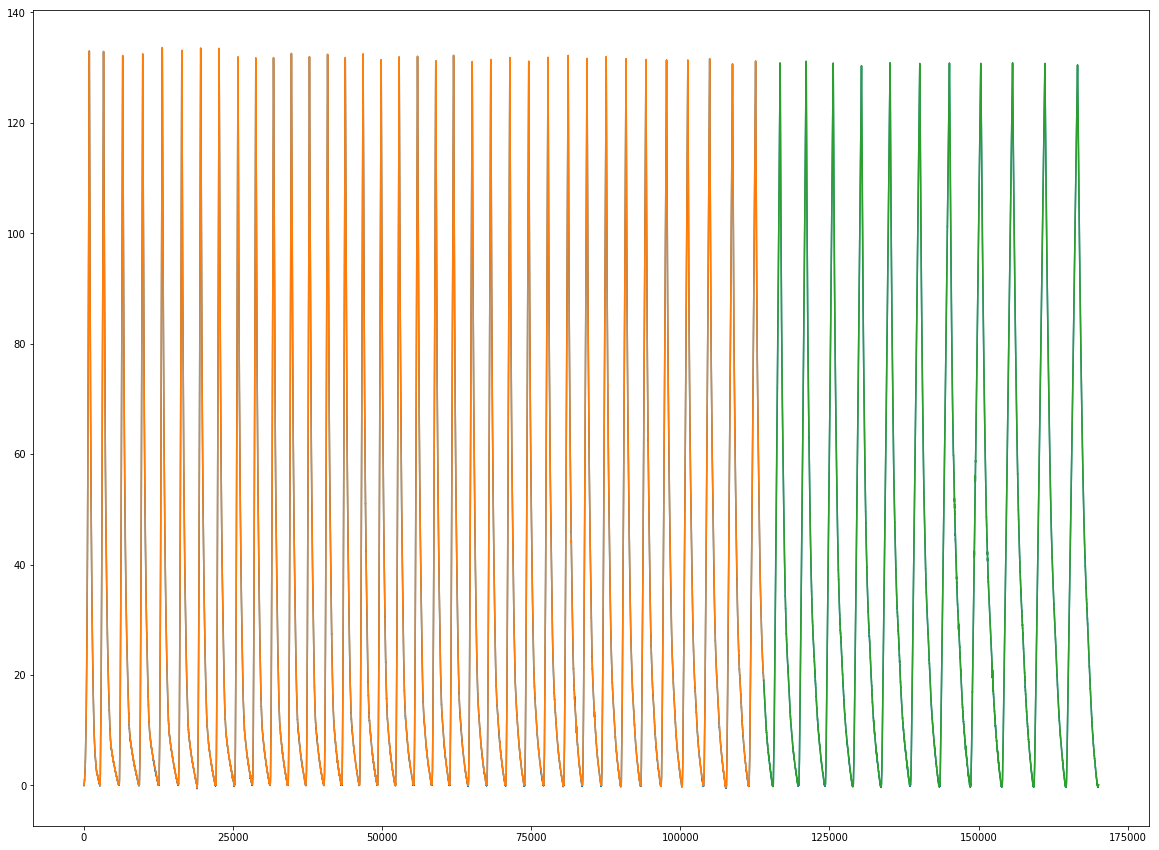

In [92]:
plt.figure(figsize=(20,15))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('fig2.pdf')
plt.show()